In [29]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import re
%matplotlib inline

In [4]:
cd

/home/dhruv


In [5]:
cd drone-defense-wall/

/home/dhruv/drone-defense-wall


In [2]:
def ask_for_tracker():
    print("Welcome! What Tracker API would you like to use?")
    print("Enter 0 for BOOSTING: ")
    print("Enter 1 for MIL: ")
    print("Enter 2 for KCF: ")
    print("Enter 3 for TLD: ")
    print("Enter 4 for MEDIANFLOW: ")
    choice = input("")
    
    if choice == '0':
        tracker = cv2.legacy.TrackerBoosting_create()
    if choice == '1':
        tracker = cv2.legacy.TrackerMIL_create()
    if choice == '2':
        tracker = cv2.legacy.TrackerKCF_create()
    if choice == '3':
        tracker = cv2.legacy.TrackerTLD_create()
    if choice == '4':
        tracker = cv2.legacy.TrackerMedianFlow_create()


    return tracker

In [22]:
cd darknet

/home/dhruv/drone-defense-wall/darknet


In [30]:
#coor=(left_x,top_y,width,height)
# Read video
cap = cv2.VideoCapture(0)
success,image = cap.read()
count = 0
if success:
    cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = cap.read()
    print('Read a new frame: ', success)
    
cap.release()
cv2.destroyAllWindows()

Read a new frame:  True


In [31]:
import re

! ./darknet detector test cfg/drone.data cfg/yolo-drone.cfg weights/yolo-drone.weights -dont_show -ext_output < data/train.txt > result.txt


#this is useful for tracking 
#will go in the tracking module
# saving the coordinates to varibles
with open('result.txt') as f:
    lines = f.readlines()
a=lines[-2]
print(lines)
b=a.split()
print(b)
left_x=int(b[3])
top_y=int(b[5])
width=int(b[7])
height=int(re.findall("^\d\d",b[9])[0])

coor=(left_x,top_y,width,height)
print(coor)

 OpenCV isn't used - data augmentation will be slow 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max                2x 2/ 2     26 x  26 x 256 ->   13 x  13 x 256 0.000 BF
  10 conv    512       3 x 3/ 1     13 x  13 x 256 ->   13 x  13 x 512 0.399 BF

In [25]:
left_x

NameError: name 'left_x' is not defined

In [34]:
with open('result.txt') as f:
    lines = f.readlines()
a=lines[-2]
print(lines)
b=a.split()
print(b)
left_x=int(b[3])
top_y=int(b[5])
width=int(b[7])
height=int(re.findall("^\d\d",b[9])[0])

coor=(left_x,top_y,width,height)
print(coor)

tracker = cv2.legacy.TrackerMedianFlow_create()
tracker_name = str(tracker).split()[0][1:]





# Read video
cap = cv2.VideoCapture(0)
success,image = cap.read()

ret, frame = cap.read()


# Special function allows us to draw on the very first frame our desired ROI
## replace this roi by the coordinates from the resultant image from the DL model resultant
roi = coor
# Initialize tracker with first frame and bounding box
ret = tracker.init(frame, roi)

#writer = cv2.VideoWriter('student_capture.mp4', cv2.VideoWriter_fourcc(*'XVID'),25, (500, 500))


while True:
    # Read a new frame
    ret, frame = cap.read()
    
    
    # Update tracker
    success, roi = tracker.update(frame)
    
    # roi variable is a tuple of 4 floats
    # We need each value and we need them as integers
    (x,y,w,h) = tuple(map(int,roi))
    
    # Draw Rectangle as Tracker moves
    if success:
        # Tracking success
        p1 = (x, y)
        p2 = (x+w, y+h)
        cv2.rectangle(frame, p1, p2, (0,255,0), 3)
        print(f'{p1} and {p2}')
    else :
        # Tracking failure
        cv2.putText(frame, "Failure to Detect Tracking!!", (100,200), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),3)

    # Display tracker type on frame
    cv2.putText(frame, tracker_name, (20,400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),3);
    
    #writer.write(frame)


    # Display result
    cv2.imshow(tracker_name, frame)

    # Exit if ESC pressed
    k = cv2.waitKey(1) & 0xff
    if k == 27 : 
        break
        
cap.release()
cv2.destroyAllWindows()

# use tracker 1 

[" GPU isn't used \n", 'mini_batch = 1, batch = 8, time_steps = 1, train = 0 \n', '\n', ' seen 64, trained: 3624 K-images (56 Kilo-batches_64) \n', 'Enter Image Path:  Detection layer: 16 - type = 28 \n', ' Detection layer: 23 - type = 28 \n', 'frame0.jpg: Predicted in 735.343000 milli-seconds.\n', 'Drone: 71%\t(left_x:   25   top_y:   72   width:  515   height:  275)\n', 'Enter Image Path: ']
['Drone:', '71%', '(left_x:', '25', 'top_y:', '72', 'width:', '515', 'height:', '275)']
(25, 72, 515, 27)
(439, 423) and (954, 450)
(439, 423) and (954, 450)
(250, 404) and (1135, 450)
(252, 404) and (1135, 450)
(250, 402) and (1135, 448)
(281, 397) and (1109, 440)
(280, 397) and (1109, 440)
(279, 396) and (1110, 439)
(281, 396) and (1107, 439)
(282, 396) and (1104, 439)
(272, 396) and (1114, 440)
(272, 397) and (1113, 441)
(273, 398) and (1112, 442)
(273, 398) and (1111, 441)
(274, 397) and (1111, 440)
(277, 396) and (1111, 439)
(274, 396) and (1114, 440)
(274, 396) and (1116, 440)
(276, 395) an

(307, 0) and (878, 29)
(305, -1) and (877, 28)
(302, -1) and (877, 29)
(297, 1) and (877, 31)
(292, 7) and (880, 37)
(285, 14) and (885, 45)
(273, 23) and (892, 55)
(265, 32) and (897, 65)
(260, 43) and (901, 76)
(256, 55) and (903, 88)
(256, 66) and (904, 99)
(253, 77) and (904, 111)
(249, 87) and (905, 121)
(237, 98) and (911, 133)
(232, 108) and (911, 143)
(225, 118) and (911, 153)
(218, 128) and (910, 164)
(214, 137) and (907, 173)
(211, 146) and (902, 182)
(200, 155) and (906, 192)
(193, 164) and (908, 201)
(188, 174) and (907, 211)
(181, 185) and (910, 223)
(179, 197) and (911, 235)
(172, 208) and (914, 246)
(169, 219) and (912, 257)
(165, 230) and (912, 269)
(164, 241) and (907, 279)
(158, 253) and (906, 292)
(149, 265) and (906, 304)
(143, 277) and (906, 317)
(141, 289) and (902, 328)
(137, 299) and (897, 338)
(131, 309) and (893, 348)
(124, 319) and (888, 359)
(116, 329) and (888, 369)
(110, 343) and (885, 383)
(105, 355) and (885, 395)
(104, 366) and (881, 406)
(92, 378) and 

(116, 123) and (1069, 173)
(116, 123) and (1070, 173)
(116, 124) and (1070, 174)
(116, 125) and (1070, 175)
(116, 127) and (1071, 177)
(116, 127) and (1070, 177)
(116, 127) and (1069, 177)
(117, 128) and (1069, 177)
(117, 129) and (1070, 178)
(117, 129) and (1069, 178)
(117, 134) and (1070, 183)
(117, 137) and (1070, 186)
(117, 138) and (1070, 187)
(117, 138) and (1070, 187)
(117, 138) and (1070, 187)
(116, 139) and (1069, 188)
(116, 138) and (1069, 187)
(115, 138) and (1069, 188)
(115, 138) and (1069, 188)
(115, 138) and (1069, 188)
(112, 138) and (1070, 188)
(112, 137) and (1071, 187)
(110, 137) and (1072, 187)
(113, 137) and (1069, 187)
(113, 137) and (1069, 187)
(117, 137) and (1066, 186)
(117, 137) and (1066, 186)
(117, 137) and (1065, 186)
(120, 136) and (1064, 185)
(120, 136) and (1064, 185)
(119, 136) and (1065, 185)
(119, 136) and (1065, 185)
(128, 136) and (1055, 184)
(129, 136) and (1055, 184)
(128, 136) and (1054, 184)
(127, 136) and (1055, 184)
(95, 134) and (1087, 186)
(9

(-222, 83) and (1468, 171)
(-221, 83) and (1468, 171)
(-222, 83) and (1469, 171)
(-224, 83) and (1470, 171)
(-225, 83) and (1471, 171)
(-227, 83) and (1472, 172)
(-227, 83) and (1472, 172)
(-230, 83) and (1473, 172)
(-229, 83) and (1472, 172)
(-231, 82) and (1472, 171)
(-229, 83) and (1471, 172)
(-229, 83) and (1471, 172)
(-230, 82) and (1471, 171)
(-229, 82) and (1470, 171)
(-227, 82) and (1463, 170)
(-223, 82) and (1457, 170)
(-211, 82) and (1443, 168)
(-210, 82) and (1442, 168)
(-205, 82) and (1434, 167)
(-196, 81) and (1421, 165)
(-197, 81) and (1421, 165)
(-200, 81) and (1421, 166)


In [61]:
img=cv2.imread("predictions.jpg")

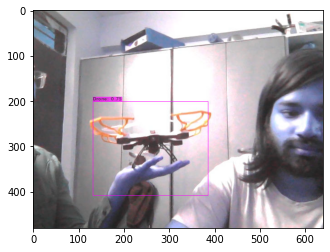

In [62]:
plt.imshow(img)

sh: line 1: dhruv/drone-defense-wall/darknet/ruv/drone-defense-wall/darknet/train.txt: No such file or directory


256